Lab: Data Wrangling (The process of converting raw data into a usable form)
Nội dung: Tích hợp dữ liệu từ nhiều nguồn bằng Pandas
Mục tiêu: Xây dựng bảng dữ liệu (data frame) dựa trên quá trình trộn dữ liệu từ nhiều bảng
thông qua mô hình ERD
Bài toán: Hãy phân tích thói quen sử dụng điện thoại di động dựa trên các nhãn hàng
Dữ liệu đầu vào:
Bảng thietbi: cho biết danh sách các thiết bị
Bảng nguoidung_thietbi: cho biết danh sách người dùng đang sở hữu thiết bị
Bảng nguoidung_sudung: cho biết danh sách quá trình người dùng dùng thiết bị
Yêu cầu dữ liệu đầu ra:
Hãy tổng hợp dữ liệu thành bảng dữ liệu mới bao gồm các cột sau để phục vụ phân tích dữ liệu
outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Brand
ing,Model

In [1]:
import pandas as pd

In [2]:
thietbi=pd.read_csv('thietbi.csv',encoding='utf-8')
nguoidung_thietbi=pd.read_csv('nguoidung_thietbi.csv',encoding='utf-8')
nguoidung_sudung=pd.read_csv('nguoidung_sudung.csv',encoding='utf-8')

In [3]:
#Xuất thông tin
thietbi

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
...,...,...,...,...
14541,pendo,PNDPP44QC10,PNDPP44QC10,PNDPP44QC10
14542,pendo,PNDPP44QC7,PNDPP44QC7,PNDPP44QC7
14543,sugar_aums,QPOINT,QPI-1,QPI-1
14544,tecmobile,OmnisOne,OmnisOne,Omnis One


In [4]:
nguoidung_thietbi

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
...,...,...,...,...,...,...
267,23049,29725,android,6.0,SM-G900F,1
268,23050,29726,ios,10.2,"iPhone7,2",3
269,23051,29726,ios,10.2,"iPhone7,2",3
270,23052,29727,ios,10.1,"iPhone8,4",3


In [5]:
nguoidung_sudung

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


In [6]:
#3. Đổi tên các cột dữ liệu cần thiết
thietbi.rename(columns={'Retail Branding':'Branding','Marketing Name':'MarketingName'},inplace=True)

4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng
kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month,
monthly_mb, use_id, platform, device]

In [7]:
dfKetQua=pd.merge(nguoidung_sudung,nguoidung_thietbi[['use_id','platform','device']],on='use_id')

In [8]:
dfKetQua.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


In [9]:
#Hoặc dùng left-join tùy theo nhu cầu
dfKetQuaKhac=pd.merge(nguoidung_sudung,nguoidung_thietbi[['use_id','platform','device']],on='use_id',how='left')
dfKetQuaKhac.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong
bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên

In [10]:
dfKetQua=pd.merge(dfKetQua,thietbi[['Branding','Model']],left_on='device',right_on='Model')

In [11]:
#Hoặc left-join
dfKetQuaKhac=pd.merge(dfKetQuaKhac,thietbi[['Branding','Model']],left_on='device',right_on='Model',how='left')

In [12]:
#6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng
sử dụng của các nhãn hàng

In [13]:
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month':'mean',
    'outgoing_sms_per_month':'mean',
    'monthly_mb':'mean',
    'use_id':'count',
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


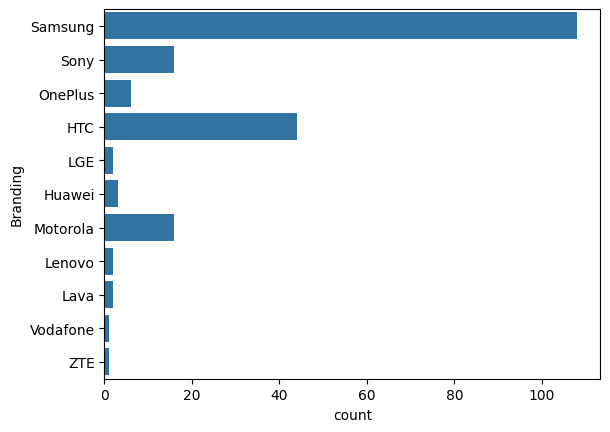

In [15]:
#8. Trực quan số lượng người dùng các nhãn hàng
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='Branding',data=dfKetQua)
plt.show()

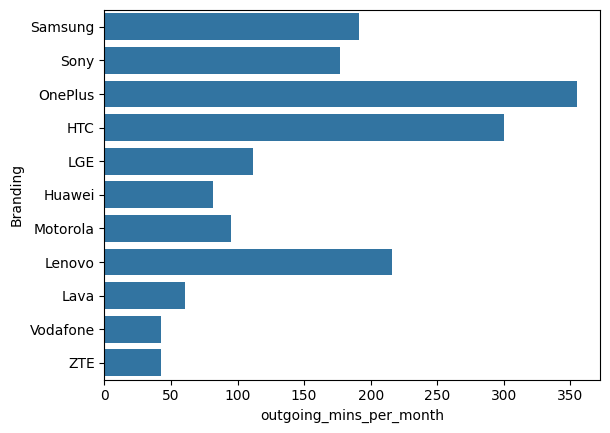

In [16]:
#9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên từng nhóm nhãn hàng bán lẻ
import numpy as np
sns.barplot(y='Branding',x='outgoing_mins_per_month',data=dfKetQua,estimator=np.mean,errorbar=None,orient='horizontal')
plt.show()

10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng

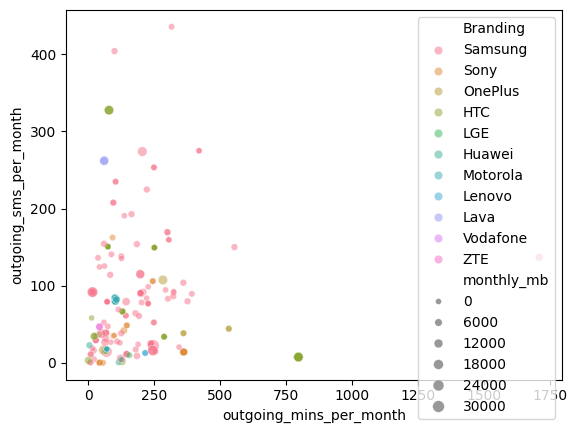

In [17]:
# 'outgoing_mins_per_month':'mean',
#     'outgoing_sms_per_month':'mean',
sns.scatterplot(x='outgoing_mins_per_month',y='outgoing_sms_per_month',size='monthly_mb',alpha=0.5,hue='Branding',data=dfKetQua)
plt.show()